In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
df_regl = regl_addons()
print(len(df_regl))

df_regl['start'] = df_regl['atac_mode'] - 150
df_regl['end'] = df_regl['atac_mode'] + 150

df_regl.head()

7076 non-promoters outside of outron/gene body (=no gene_id)


/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice


13195 of 42245 sites with CV values via promoter annotation
32525 of 42245 sites with CV values via "associated gene"
42245


,chrom,start,end,annot,annot_fwd,annot_rev,promoter_gene_id_fwd,promoter_locus_id_fwd,promoter_gene_biotype_fwd,promoter_gene_id_rev,...,lcap_incr_glp1_d3_rev,lcap_incr_glp1_d7_fwd,lcap_incr_glp1_d7_rev,lcap_incr_glp1_d10_fwd,lcap_incr_glp1_d10_rev,lcap_incr_glp1_d14_fwd,lcap_incr_glp1_d14_rev,atac_wt_mean_height,atac_wt_max_height,CV
0,chrI,1831,2131,putative_enhancer,transcription_initiation,transcription_initiation,.,.,.,.,...,False,False,False,False,False,False,False,1.701709,2.898105,0.517
1,chrI,3751,4051,non-coding_RNA,unknown_promoter,non-coding_RNA,.,.,.,WBGene00023193,...,True,False,False,False,True,False,True,111.630629,194.084503,NaN
2,chrI,4206,4506,putative_enhancer,transcription_initiation,transcription_initiation,.,.,.,.,...,False,False,False,False,False,False,False,3.610668,7.059840,0.232
3,chrI,11205,11505,coding_promoter,coding_promoter,transcription_initiation,WBGene00022276,nlp-40,protein_coding,.,...,False,False,False,False,False,False,False,8.351881,12.851040,0.517
4,chrI,12997,13297,putative_enhancer,transcription_initiation,transcription_initiation,.,.,.,.,...,False,False,False,False,False,False,False,3.465213,5.160855,0.517


In [3]:
df_hubs = pd.read_csv('etc/hubs_13orMoreinteractions.bed', sep='\t', names=yp.NAMES_BED3).sort_values(yp.NAMES_BED3).reset_index(drop=True)
print('%s hubs' % (len(df_hubs),))
df_hubs.head()

880 hubs


,chrom,start,end
0,chrI,42085,42330
1,chrI,70007,70234
2,chrI,397816,398070
3,chrI,516661,516928
4,chrI,518469,518728


In [4]:
df_hubsf = df_hubs.copy()
df_hubsf['start'] = df_hubs[['start', 'end']].mean(axis=1).map(int) - 150
df_hubsf['end'] = df_hubs[['start', 'end']].mean(axis=1).map(int) + 150
df_hubsf.head()

,chrom,start,end
0,chrI,42057,42357
1,chrI,69970,70270
2,chrI,397793,398093
3,chrI,516644,516944
4,chrI,518448,518748


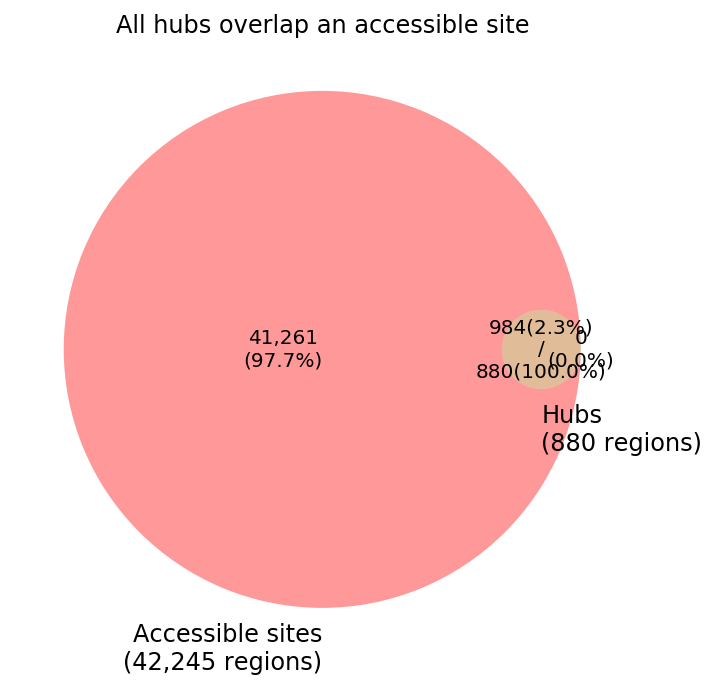

In [5]:
# Overlap accessible sites and hubs
gv = yp.GenomicVenn2(
    BedTool.from_dataframe(df_regl[['chrom', 'start', 'end', 'annot']]),
    BedTool.from_dataframe(df_hubs),
    label_a='Accessible sites',
    label_b='Hubs',
)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.title('All hubs overlap an accessible site')
gv.plot()

In [6]:
# Table of gene_biotype in the canonical geneset
df_raw = yp.read_wbgtf('WS260_ce10/WS260_ce10.genes.gtf.gz', parse_attr=False)
df_genes = yp.df_gfftags_unpack(df_raw, name='attribute')
df_genes['gene_biotype'].value_counts()

/mnt/home1/ahringer/jj374/relmapping/scripts/yarp/yarp.py:399: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df_name = df_name.convert_objects(convert_numeric=True)


protein_coding    20210
piRNA             15364
ncRNA              7741
pseudogene         1791
tRNA                612
snoRNA              345
miRNA               257
lincRNA             172
snRNA               130
antisense           100
rRNA                 20
Name: gene_biotype, dtype: int64

/mnt/home1/ahringer/jj374/relmapping/scripts/yarp/yarp.py:399: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df_name = df_name.convert_objects(convert_numeric=True)


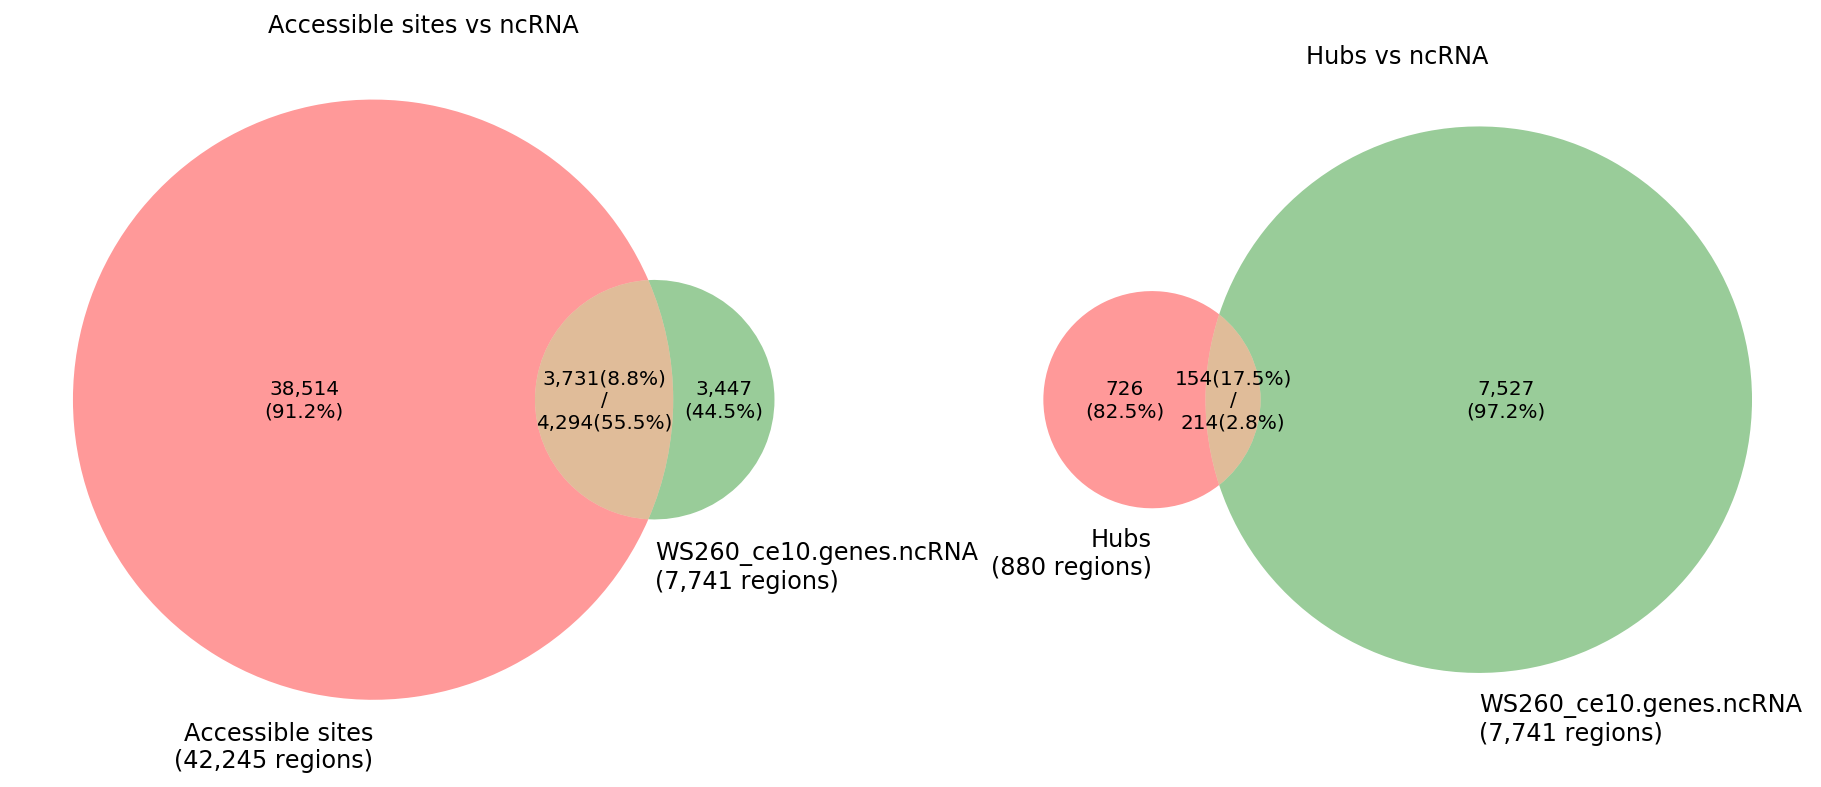

In [7]:
df_ncRNA = yp.read_wbgtf('WS260_ce10/WS260_ce10.genes.ncRNA.gtf.gz', parse_attr=True)

gv_atac = yp.GenomicVenn2(
    BedTool.from_dataframe(df_regl[['chrom', 'start', 'end']]),
    BedTool.from_dataframe(df_ncRNA[yp.NAMES_BED3]),
    label_a='Accessible sites',
    label_b='WS260_ce10.genes.ncRNA',
)

gv_hubs = yp.GenomicVenn2(
    BedTool.from_dataframe(df_hubsf),
    BedTool.from_dataframe(df_ncRNA[yp.NAMES_BED3]),
    label_a='Hubs',
    label_b='WS260_ce10.genes.ncRNA',
)

plt.figure(figsize=(16,12))
plt.subplot(1,2,1)
plt.title('Accessible sites vs ncRNA')
gv_atac.plot()

plt.subplot(1,2,2)
plt.title('Hubs vs ncRNA')
gv_hubs.plot()

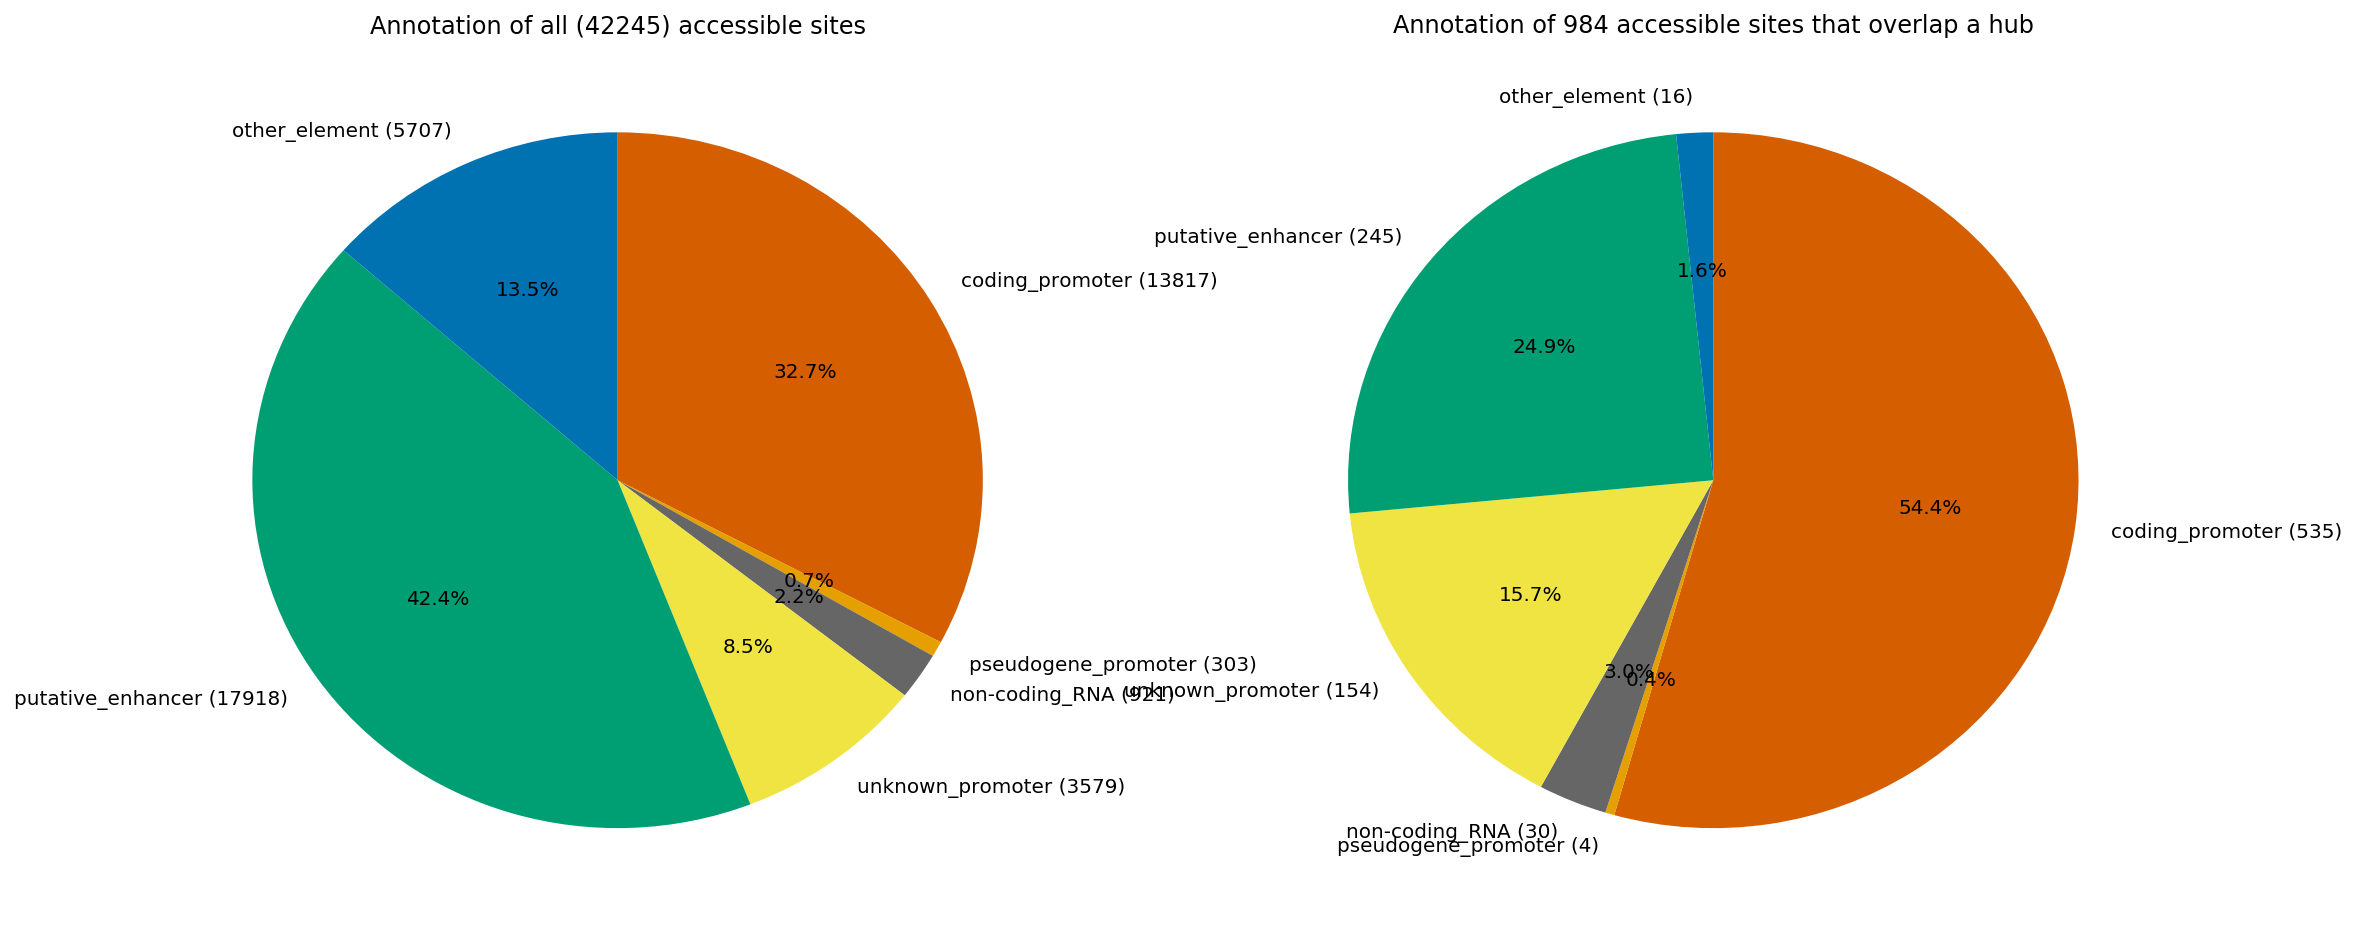

In [8]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
annot_count_ = df_regl['annot'].value_counts()[config['annot']]
plt.title('Annotation of all (%d) accessible sites' % (len(df_regl),))
plt.pie(
    annot_count_.values,
    labels = ['%s (%d)' % (l, c) for l, c in annot_count_.iteritems()],
    colors=[yp.RED, yp.ORANGE, '0.4', yp.YELLOW, yp.GREEN, yp.BLUE],
    counterclock=False,
    startangle=90,
    autopct='%.1f%%',
);

plt.subplot(1,2,2)
annot_count_ = gv.df_a_with_b['name'].value_counts()[config['annot']]
plt.title('Annotation of %d accessible sites that overlap a hub' % (len(gv.df_a_with_b),))
plt.pie(
    annot_count_.values,
    labels = ['%s (%d)' % (l, c) for l, c in annot_count_.iteritems()],
    colors=[yp.RED, yp.ORANGE, '0.4', yp.YELLOW, yp.GREEN, yp.BLUE],
    counterclock=False,
    startangle=90,
    autopct='%.1f%%',
);